# IRIS FLOWER CLASSIFICATION PROJECT

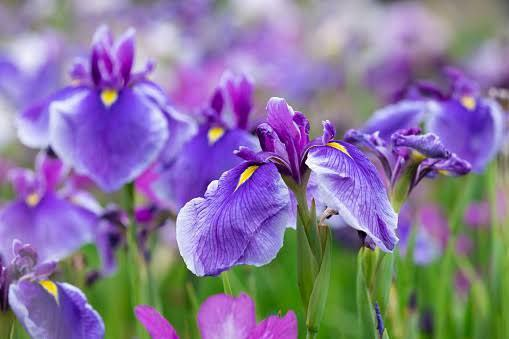

#### PROBLEM STATEMENT

The problem statement of the Iris flower classification involves developing a model to accurately classify iris flowers into different species based on their sepal and petal measurements. The dataset contains features like sepal length, sepal width, petal length, and petal width, and the goal is to build a machine learning model that can predict whether an iris flower belongs to one of three species: setosa, versicolor, or virginica. The challenge is to create a robust and accurate classification algorithm that can handle variations in the input features and generalize well to new, unseen data.

#### METHODS FOR BUILDING MODEL:

To build a model to predict CO2 Emission by Vehicles, following steps are performed.

Importing Dataset
->Preprocessing Dataset
->Data Analysis
->Analysis Conclusion
->Training model
->Building Model

In [1]:
# IMPORTED LIBRARIES

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [3]:
# IMPPORTED DATASET:

In [4]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Short Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# There are total 6 column in dataset
# No Null value in all columns
# id column has int datatype, species has object datatype and other are float
# There are total 150 rown in our dataset

In [7]:
# Shape of dataset :
# 150 rows and 6 columns

df.shape

(150, 6)

In [8]:
# TO check Duplicate values

df.duplicated().sum()

0

In [9]:
# No duplicates values in dataset

### Data Analysis

In [10]:
# Missing Values

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# No Missing value in dataset

In [12]:
# Classes in target columns

a=df['Species'].value_counts()
a

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [65]:
# We have removed ID column here that does not effect on our model

df.drop('Id',axis=1,inplace=True)

KeyError: "['Id'] not found in axis"

In [67]:
# Data Description:

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [68]:
# We have describe Whole data here, 
# Here we can get description of every features like (count, mean, median, min, max, standard deviation etc.)

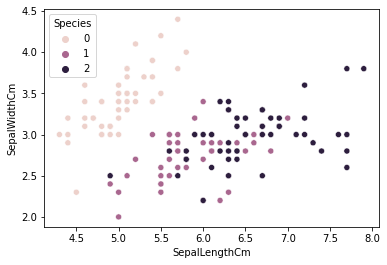

In [69]:
# Here we can see relationship between setosa, versicolor, virginica

sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data=df, hue='Species')
plt.show()

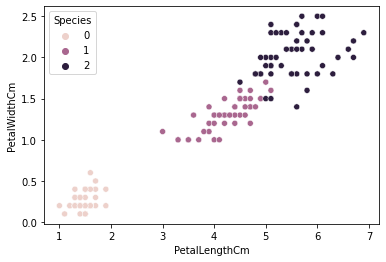

In [70]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm', data=df, hue='Species')
plt.show()

In [71]:
# Here we have noticed distribution of input features

[]

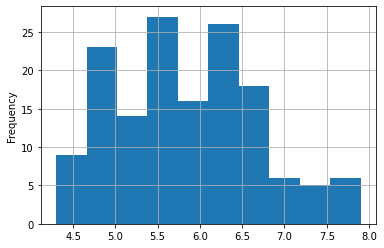

In [72]:

df['SepalLengthCm'].plot(kind='hist')
plt.grid()
plt.plot()

[]

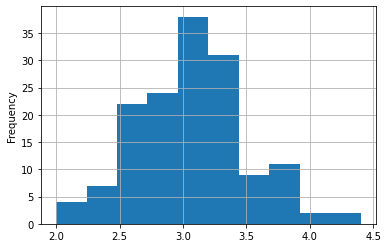

In [73]:
df['SepalWidthCm'].plot(kind='hist')
plt.grid()
plt.plot()

[]

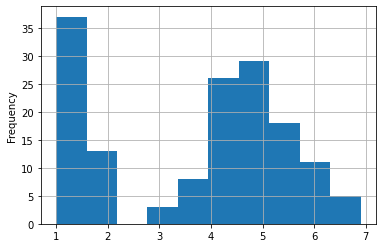

In [74]:
df['PetalLengthCm'].plot(kind='hist')
plt.grid()
plt.plot()

[]

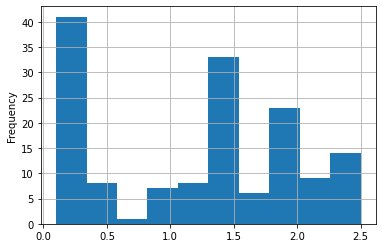

In [75]:
df['PetalWidthCm'].plot(kind='hist')
plt.grid()
plt.plot()

In [76]:
# Here we have compared Input variables with target variable

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

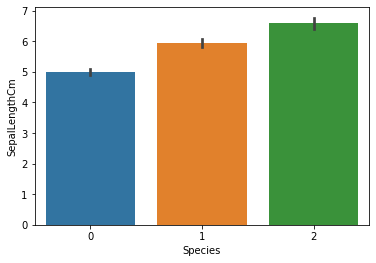

In [77]:

sns.barplot(x=df['Species'],y=df['SepalLengthCm'])

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

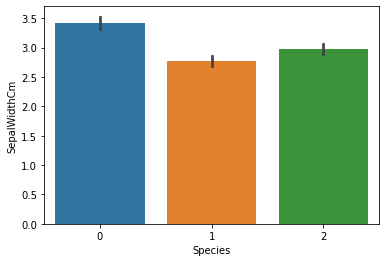

In [78]:
sns.barplot(x=df['Species'],y=df['SepalWidthCm'])

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

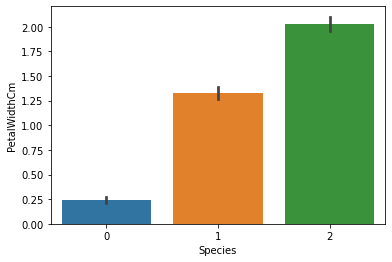

In [79]:
sns.barplot(x=df['Species'],y=df['PetalWidthCm'])

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

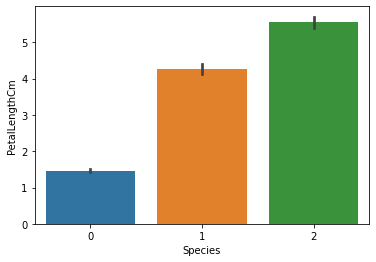

In [80]:
sns.barplot(x=df['Species'],y=df['PetalLengthCm'])

In [81]:
# We can see the relation between data with the help of Pairplot
# also noticed classification of data

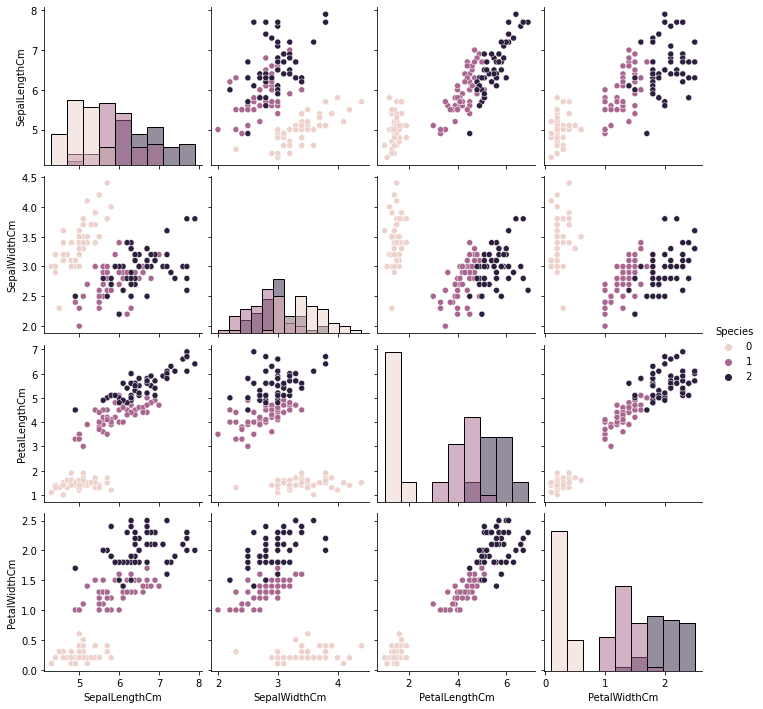

In [82]:
sns.pairplot(df,hue='Species',diag_kind='hist')
plt.show()

### Outliers Detection

In [83]:
# Here we are using boxplot for detecting outliers 

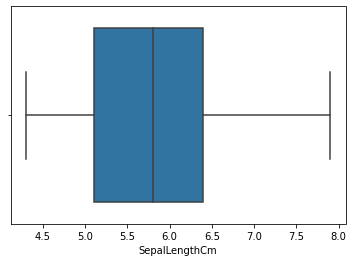

In [153]:
sns.boxplot(df['SepalLengthCm'])
plt.show()

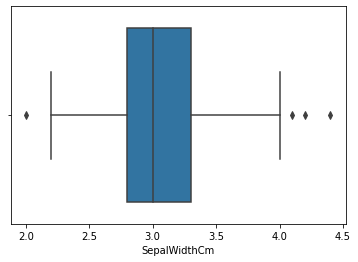

In [154]:
# There are outliers are present in SepalWidth feature

sns.boxplot(df['SepalWidthCm'])
plt.show()

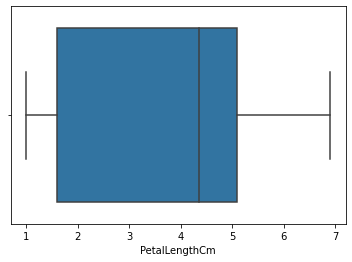

In [155]:
# No outliers are present in PetalLengthCm feature

sns.boxplot(df['PetalLengthCm'])
plt.show()

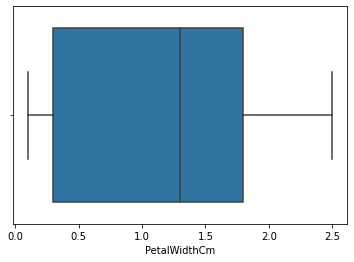

In [156]:
# No outliers are present in PetalWidthCm feature

sns.boxplot(df['PetalWidthCm'])
plt.show()

In [157]:
# Corelation between data 

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

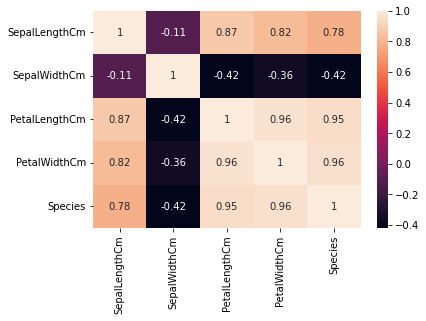

In [158]:
# Heatmap for checing co-realation for data

sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [159]:
# TO Convert categorical features into numerical features

In [160]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [161]:
# Converted Target variable into numeric values by using LabelEncoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [162]:
df['Species']=le.fit_transform(df['Species'])

### Seperation X,Y

In [163]:
X=df.drop('Species',axis=1)
y=df['Species']

In [95]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
y.sample(5)

4      0
2      0
47     0
127    2
132    2
Name: Species, dtype: int64

### Feature Scaling

In [97]:
# To convert data into same scale in range of 0 to 1

In [98]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [99]:
X_mm=mm.fit_transform(X)

In [100]:
print(X_mm)       # Scalled between 0 to 1  

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

### Cross Validation

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
xtrain,xtest,ytrain,ytest=train_test_split(X_mm,y, test_size=0.2, random_state=1)

In [103]:
print(xtrain.shape)
print(xtest.shape)

(120, 4)
(30, 4)


In [104]:
print(ytrain.shape)
print(ytest.shape)

(120,)
(30,)


## Model Building

Now we will build model by using different Machine Learning Algorithms
and apply this algorithm which will perform better than other algorithms.

We can apply Logistic Regression, Random Forest, KNN, DT algorithms etc. 
we will use that algorithm which will give best Accuracy.

In [165]:
# imported Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [173]:
# Object Created

lr=LogisticRegression()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
sv=SVC()

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [175]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    
    print('classification_report : ',classification_report(ytest,ypred))
    
    print('confusion_matrix : ',confusion_matrix(ytest,ypred))
    
    print('Training accuracy : ',model.score(xtrain,ytrain))
    
    print('Testing Accuracy : ',model.score(xtest,ytest))
    
    print('Final Accuracy Score : ', accuracy_score(ytest,ypred))
          
    return model

### Performance of Logistic Regression:


In [176]:

print(mymodel(lr))

classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

confusion_matrix :  [[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
Training accuracy :  0.925
Testing Accuracy :  0.9
Final Accuracy Score :  0.9
LogisticRegression()


#### Performance of KNN


In [177]:
print(mymodel(knn))

classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix :  [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Training accuracy :  0.95
Testing Accuracy :  0.9666666666666667
Final Accuracy Score :  0.9666666666666667
KNeighborsClassifier()


#### Performance of Decision Tree


In [178]:
print(mymodel(dt))

classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix :  [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Training accuracy :  1.0
Testing Accuracy :  0.9666666666666667
Final Accuracy Score :  0.9666666666666667
DecisionTreeClassifier()


#### Performance of SVM


In [179]:
print(mymodel(sv))

classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix :  [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Training accuracy :  0.9666666666666667
Testing Accuracy :  0.9666666666666667
Final Accuracy Score :  0.9666666666666667
SVC()


### CONCLUSION

SVM, Decision Tree, KNN are performing well so we can choose any one of these. We got here 96.66 % accuracy on Support vector machine algorithm, svm performs well as compare to other algorithms.
So we can use SVM for next Prediction and build model based on SVM.